In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from pyACC.clustering import get_power_spectrum,generate_gaussian_map

import camb

from scipy.interpolate import interp1d

## CAMB Parameters

In [2]:
Omega_b=0.05
Omega_c=0.25

h=0.7
As=2.1e-9
ns=0.96

pars=camb.CAMBparams()
pars.set_cosmology(H0=100*h,ombh2=Omega_b*h**2,omch2=Omega_c*h**2)
pars.InitPower.set_params(As=As,ns=ns)

pars.set_matter_power(redshifts=[10.],kmax=100.)
results=camb.get_results(pars)

kh,z,pk=results.get_matter_power_spectrum(minkh=1e-4,maxkh=100,npoints=1000)

In [3]:
#Power spectrum interpolator
pk_func=interp1d(kh,pk[0],fill_value='extrapolate',kind='cubic')

#Box
side=500 #Mpc/h
spacing=5 #Mpc/h

In [4]:
delta_k,delta_x=generate_gaussian_map(pk_func,side,spacing)

(array([3.00000e+00, 1.20000e+01, 3.40000e+01, 1.68000e+02, 5.06000e+02,
        1.41900e+03, 3.63400e+03, 8.20200e+03, 1.69580e+04, 3.09100e+04,
        5.04190e+04, 7.57250e+04, 1.01371e+05, 1.20656e+05, 1.30701e+05,
        1.26277e+05, 1.09499e+05, 8.56410e+04, 5.99050e+04, 3.77700e+04,
        2.14270e+04, 1.05430e+04, 4.98400e+03, 2.12600e+03, 7.73000e+02,
        2.48000e+02, 6.60000e+01, 1.40000e+01, 6.00000e+00, 3.00000e+00]),
 array([-0.92812345, -0.86493542, -0.80174739, -0.73855935, -0.67537132,
        -0.61218329, -0.54899525, -0.48580722, -0.42261918, -0.35943115,
        -0.29624312, -0.23305508, -0.16986705, -0.10667901, -0.04349098,
         0.01969705,  0.08288509,  0.14607312,  0.20926116,  0.27244919,
         0.33563722,  0.39882526,  0.46201329,  0.52520133,  0.58838936,
         0.65157739,  0.71476543,  0.77795346,  0.84114149,  0.90432953,
         0.96751756]),
 <BarContainer object of 30 artists>)

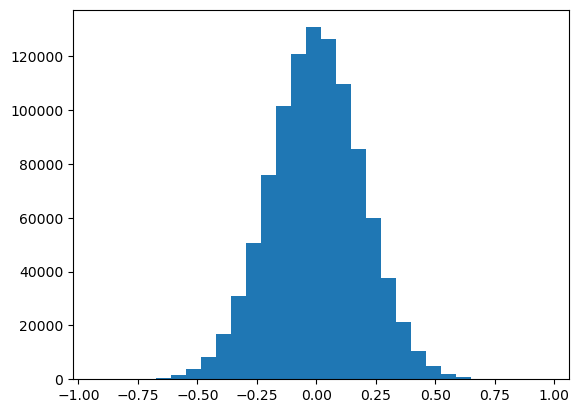

In [5]:
plt.hist(delta_x.flatten(),bins=30)

In [6]:
#Power spectrum
n_kF=3
k_bins,pk_meas=get_power_spectrum(delta_x,side,spacing,n_kF=n_kF)

/Users/marigalla/anaconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/marigalla/anaconda3/envs/acc-env/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


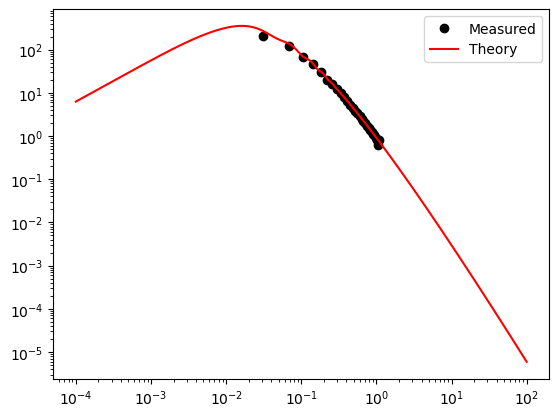

In [7]:
plt.loglog(k_bins, pk_meas, "o", color="black", label="Measured")
plt.loglog(kh, pk[0], color="red", label="Theory")
plt.legend()

### Generate points

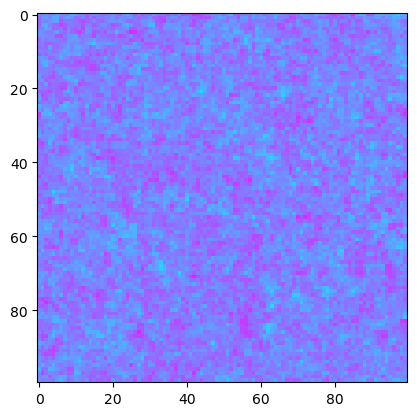

In [8]:
n_mean=0.001
Volume=side**3
N_part=Volume*n_mean

plt.imshow(delta_x[0],cmap='cool',vmin=-1,vmax=1)

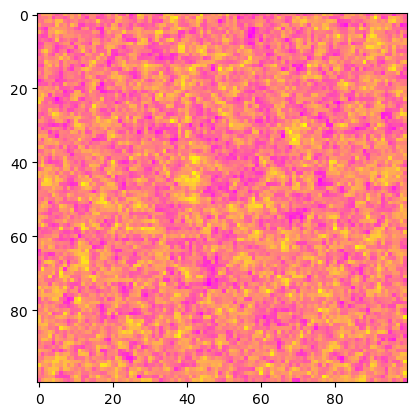

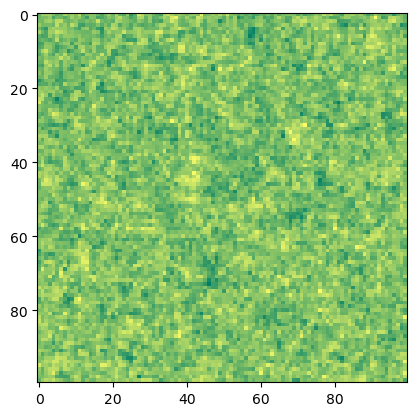

In [9]:
n_x=n_mean*(1+delta_x)
Nobj_x=n_x*spacing**3

plt.imshow(n_x[:,:,0],cmap='spring')
plt.show()
plt.imshow(Nobj_x[:,:,0],cmap='summer')
plt.show()

### Discrete Sampling
Import a discrete sample $\rightarrow$ put the sample on a grid using NGP

(array([8.83003e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.09843e+05, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        6.87300e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.70000e+02, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.10000e+01]),
 array([-1.        , -0.99999893, -0.99999787, -0.9999968 , -0.99999573,
        -0.99999467, -0.9999936 , -0.99999253, -0.99999147, -0.9999904 ,
        -0.99998933, -0.99998827, -0.9999872 , -0.99998613, -0.99998507,
        -0.999984  , -0.99998293, -0.99998187, -0.9999808 , -0.99997973,
        -0.99997867, -0.9999776 , -0.99997653, -0.99997547, -0.9999744 ,
        -0.99997333, -0.99997227, -0.9999712 , -0.99997013, -0.99996907,
        -0.999968  ]),
 <BarContainer object of 30 artists>)

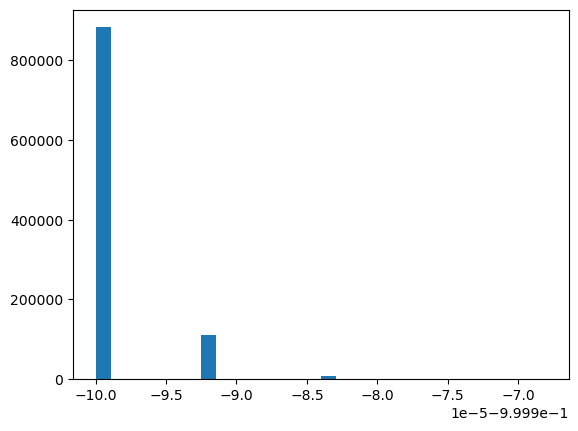

In [10]:
Npart=np.random.poisson(Nobj_x)
delta_N_x=Npart/np.sum(N_part)-1
plt.hist(delta_N_x.flatten(),bins=30)

## Power Spectrum

In [11]:
k_bin,pk_N_meas=get_power_spectrum(delta_N_x,side,spacing,n_kF=n_kF)

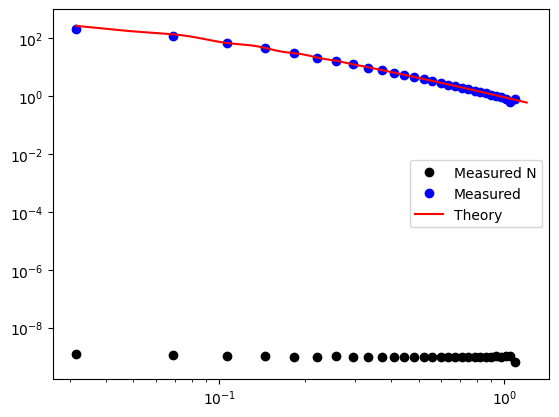

In [14]:
kF=2*np.pi/side
kN=2*np.pi/spacing
plt.loglog(k_bin, pk_N_meas, "o", color="black", label="Measured N")
plt.loglog(k_bins, pk_meas, "o", color="blue", label="Measured")
plt.loglog(kh[(kh>k_bins[0])&(kh<k_bins[-1])], pk_func(kh[(kh>k_bins[0]) & (kh<k_bins[-1])]), color="red", label="Theory")
plt.legend()
plt.show()